# [E-01] (1) load_digits : 손글씨를 분류해 봅시다

In [1]:
#라이브러리 버전 확인
import sklearn

print(sklearn.__version__)

1.0


In [2]:
#필요한 모듈 import하기
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
#데이터 준비
digits = load_digits()
digits_data = digits.data
digits_label = digits.target

In [4]:
digits.keys() # digits에 어떤 정보가 담겼을지 확인

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(digits_data.shape) # 데이터의 크기 확인. shape는 배열의 형상정보를 출력.

(1797, 64)


In [6]:
digits_data[0] # 샘플로 하나의 데이터만 확인

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

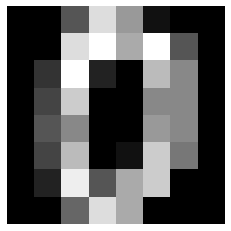

In [7]:
from pandas.errors import InvalidIndexError
#픽셀 데이터를 이미지로 보기 위해 plt 사용
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

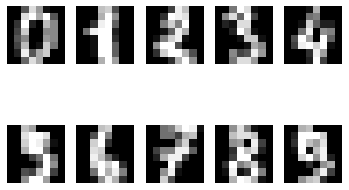

In [8]:
# 여러 개의 이미지를 확인
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(digits.data[i].reshape(8, 8),cmap='gray')
  plt.axis('off')
plt.show()

In [9]:
# target 데이터 확인
print(digits_label.shape)
digits_label[:20] # 슬라이싱 digits.target을 20개 가져와라. 20말고 다른 수 넣어도 상관 X 

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
# target 데이터의 이름을 확인
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [11]:
# digits 데이터에 대한 설명
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [12]:
# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=10)

In [13]:
# 모델 학습 및 예측
##Decision Tree 사용해 보기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        37
           1       0.89      0.91      0.90        34
           2       0.82      0.91      0.86        34
           3       0.78      0.88      0.82        40
           4       0.70      0.82      0.76        34
           5       0.91      0.91      0.91        32
           6       0.94      0.86      0.90        37
           7       0.90      0.90      0.90        40
           8       0.88      0.67      0.76        33
           9       0.81      0.74      0.77        39

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360

정답률= 0.8527777777777777


In [14]:
## Random Forest 사용해 보기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      0.94      0.96        34
           2       0.92      1.00      0.96        34
           3       0.95      1.00      0.98        40
           4       0.97      0.94      0.96        34
           5       0.94      1.00      0.97        32
           6       1.00      0.97      0.99        37
           7       0.95      0.97      0.96        40
           8       0.94      0.88      0.91        33
           9       0.97      0.92      0.95        39

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

정답률= 0.9611111111111111


In [15]:
## Support Vector Machine (SVM) 사용해 보기
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       0.97      1.00      0.99        34
           3       1.00      0.97      0.99        40
           4       1.00      0.94      0.97        34
           5       0.97      1.00      0.98        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.91      0.97      0.94        33
           9       1.00      0.95      0.97        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

정답률= 0.9833333333333333


In [16]:
## Stochastic Gradient Descent Classifier (SGDClassifier) 사용해 보기
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.86      0.94      0.90        34
           2       0.94      1.00      0.97        34
           3       0.97      0.95      0.96        40
           4       0.89      0.91      0.90        34
           5       0.80      1.00      0.89        32
           6       1.00      0.97      0.99        37
           7       1.00      0.95      0.97        40
           8       0.81      0.79      0.80        33
           9       1.00      0.79      0.89        39

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360

정답률= 0.9277777777777778


In [17]:
## Logistic Regression 사용해 보기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.91      0.91      0.91        34
           2       0.92      1.00      0.96        34
           3       1.00      0.95      0.97        40
           4       0.94      0.91      0.93        34
           5       0.94      0.94      0.94        32
           6       0.97      0.97      0.97        37
           7       0.97      0.95      0.96        40
           8       0.89      0.94      0.91        33
           9       0.97      0.92      0.95        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

정답률= 0.95


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=5000) 

logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred))
# 위의 Logistic Regression 사용해 보기에서 오류가 뜸. 확인해보니 반복 횟수의 max를 크게 하거나
# 아래 링크를 따라 데이터를 조정해주면 되는데 max를 크게하는 방법 사용.(Logistic Regression의 max_iter 기본값은 100인데 100보다 큰수 5000으로 설정)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.91      0.91        34
           2       0.92      1.00      0.96        34
           3       0.97      0.95      0.96        40
           4       0.94      0.94      0.94        34
           5       0.94      0.94      0.94        32
           6       0.97      0.97      0.97        37
           7       0.97      0.95      0.96        40
           8       0.89      0.94      0.91        33
           9       1.00      0.92      0.96        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

정답률= 0.9527777777777777


-------------------------------------------------------------------

# 모델 평가

- Decision Tree
    정답률 = 0.85
- Random Forest
    정답률 = 0.96
- Support Vector Machine (SVM)
    정답률 = 0.98
- Stochastic Gradient Descent Classifier (SGDClassifier)
    정답률 = 0.93
- Logistic Regression
    정답률 = 0.95
    
아주 근소한 차이로 Support Vector Machine (SVM)가 정답률이 더 높음.
그러므로 SVM이 digits_data를 가장 잘 구분하는 듯 합니다.

# 회고 


- 아직 잘 몰라서 노드에서 했던 그대로 진행.

- 알게 된 점 :
   
   digits_label[:20]에서 20은 digits.target을 슬라이싱해서 20개를 가져와라하는 말.
    
    Logistic Regression 사용해 보기에서 /opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT. 라는 경고문이 뜸. 확인해보니 반복 횟수의 max를 크게 하거나 데이터를 조정해주면 되는데 max를 조정하는 방법 사용.(Logistic Regression의 max_iter 기본값은 100인데 100보다 큰수 5000으로 설정)


- 앞으로는 노드 참고하지 않고도 혼자서 만들 수 있었으면 좋겠음.